In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (11, 7)

In [2]:
df =  pd.read_csv('dataFine.csv')

C:\Users\victo\AppData\Local\Temp\ipykernel_3028\4043669217.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv('dataFine.csv')


In [3]:
data = df[(df['year']==2020) & (df['month']!='Декабрь')].reset_index()
data.head(1)

index  Unnamed: 0     id                           district  \
0   1382        1382  40299  Дальневосточный федеральный округ   

             region month_application  changed_value    age gender  education  \
0  Амурская область        2020-01-01          False  28-33      0          4   

   hc_repeat  hc_didnotwork  find_new_job  count  year   month  
0       True          False          True      2  2020  Январь

In [4]:
group_by = pd.pivot_table(data, values="count",index=["year",'month','education','gender', 'hc_didnotwork', 'find_new_job','hc_repeat', 'age','region', 'district'], aggfunc="sum").reset_index()

In [5]:
education_dictionary = {
                            1:'Начальное общее образование',
                            2:'Основное общее образование',
                            3:'Среднее общее образование',
                            4:'Среднее профессиональное образование',
                            6:'Высшее образование',
                            9:'Другое',
                            0:'Нет данных'
                        }
gender_dictionary = {1:'Мужчины', 
                     0: 'Женщины',
                     #По совершенно не понятной мне причине - сбилась именно в этом столбце правка. 
                     #Причём в самом блокноте, где делалась правка - всё нормально. И в других столбцах тоже всё хорошо.
                     #Придётся внести дополнительно - но это какой-то баг
                     '1': 'Мужчины',
                     '0': 'Женщины',
                     'None': 'Не указан'}

group_by['education'] = group_by['education'].map(education_dictionary)
group_by['gender'] = group_by['gender'].map(gender_dictionary)

In [6]:
month = [ 'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь']
group_by['month'] = pd.Categorical(group_by['month'], categories = month, ordered=True)

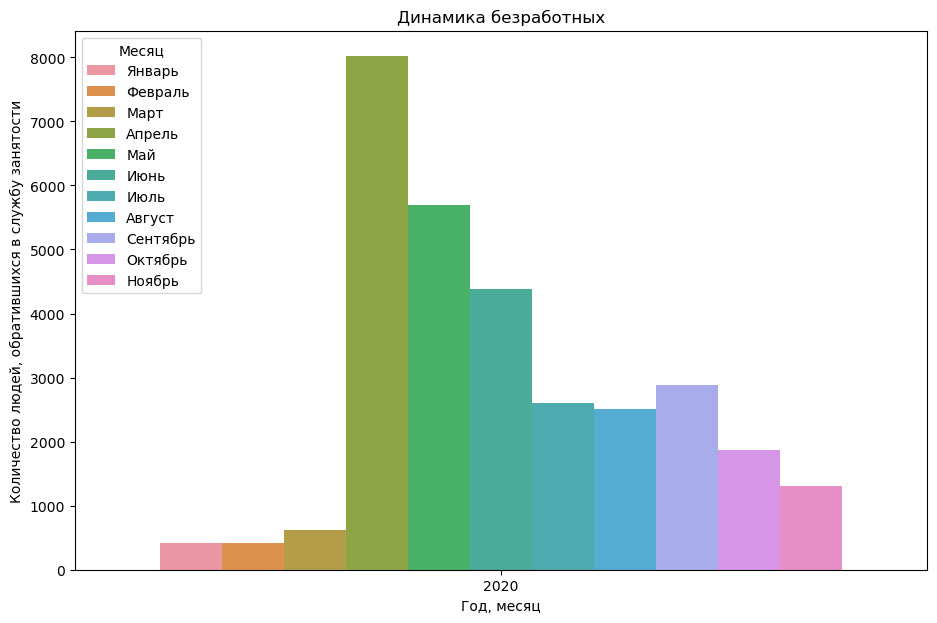

In [13]:
sns.barplot(data=group_by,x='year',y='count',hue='month',ci=False, estimator = lambda x: max(x)).set(xlabel='Год, месяц', ylabel = 'Количество людей, обратившихся в службу занятости', title = 'Динамика безработных')



plt.legend(title='Месяц', loc='upper left')
plt.savefig('Task6_1.png')

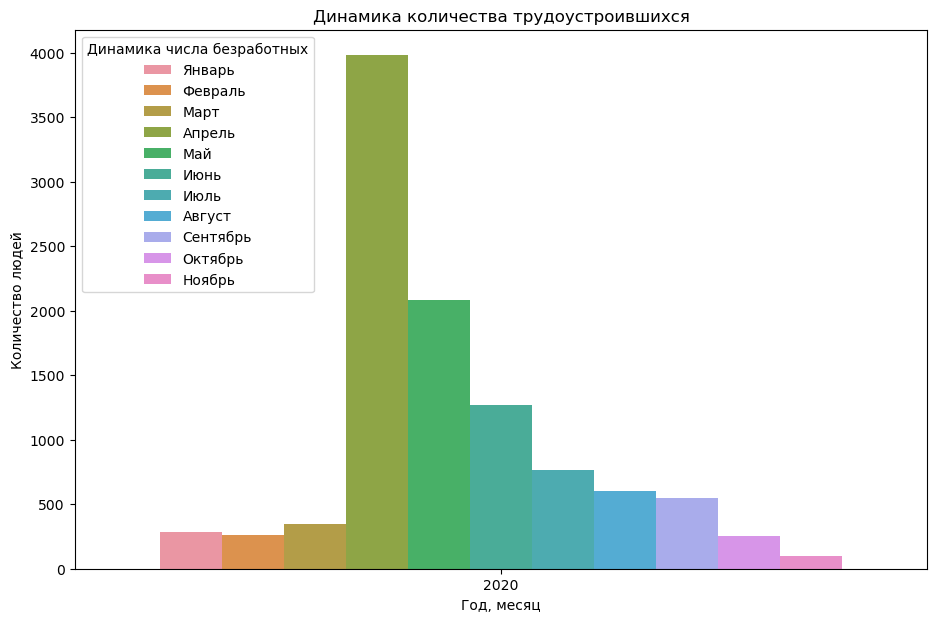

In [14]:
sns.barplot(data=group_by[group_by['find_new_job']==True],x='year',y='count',hue='month',ci=False, estimator = lambda x: max(x)).set(xlabel='Год, месяц', ylabel = 'Количество людей', title = 'Динамика количества трудоустроившихся')



plt.legend(title='Динамика числа безработных', loc='upper left')
plt.savefig('Task6_8.png')

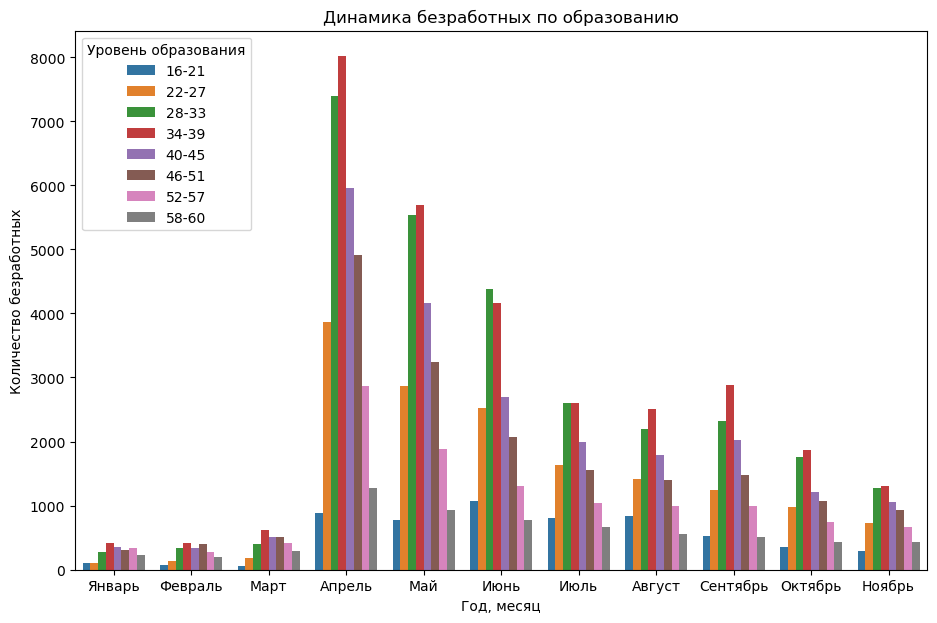

In [15]:
sns.barplot(data=group_by,x='month',y='count',hue='age',ci=False, estimator = np.max).set(xlabel='Год, месяц', ylabel = 'Количество безработных', title = 'Динамика безработных по образованию')



plt.legend(title='Уровень образования', loc='upper left')

plt.savefig('Task6_2.png')

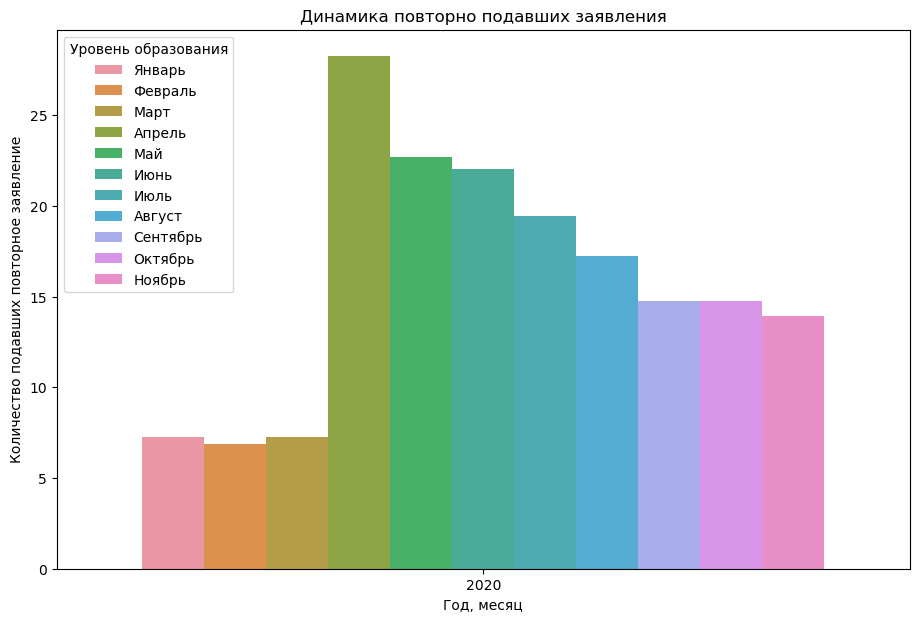

In [9]:
sns.barplot(data=group_by,x='year',y='count',hue='month',ci=False).set(xlabel='Год, месяц', ylabel = 'Количество подавших повторное заявление', title = 'Динамика повторно подавших заявления')



plt.legend(title='Уровень образования', loc='upper left')

plt.savefig('Task6_3.png')

In [10]:
finded_job_1 = {edu_lev : group_by[group_by['education'] == edu_lev]['count'].sum() for edu_lev in group_by['education'].unique()}
finded_job_2 = {federal : group_by[group_by['district'] == federal]['count'].sum() for federal in group_by['district'].unique()}
finded_job_3 = {region : group_by[group_by['region'] == region]['count'].sum() for region in group_by['region'].unique()}

def percentage_per_crit(criteria, count, crit):
    #overall = data_5_t_2[data_5_t_2['education'] == edu_level]['count'].sum()
    if crit == "e":
        overall = finded_job_1[criteria]
    elif crit == "d":
        overall = finded_job_2[criteria]
    else:
        overall = finded_job_3[criteria]

    return (count / overall * 100).round(6)

In [16]:
group_by1 = group_by[group_by['find_new_job']==True].copy()
group_by1['%_per_edu'] = group_by1.apply(lambda x: percentage_per_crit(x["education"],x['count'], 'e'),axis=1)
group_by1['%_per_distr'] = group_by1.apply(lambda x: percentage_per_crit(x["district"],x['count'], 'd'),axis=1)
group_by1['%_per_reg'] = group_by1.apply(lambda x: percentage_per_crit(x["region"],x['count'], 'r'),axis=1)

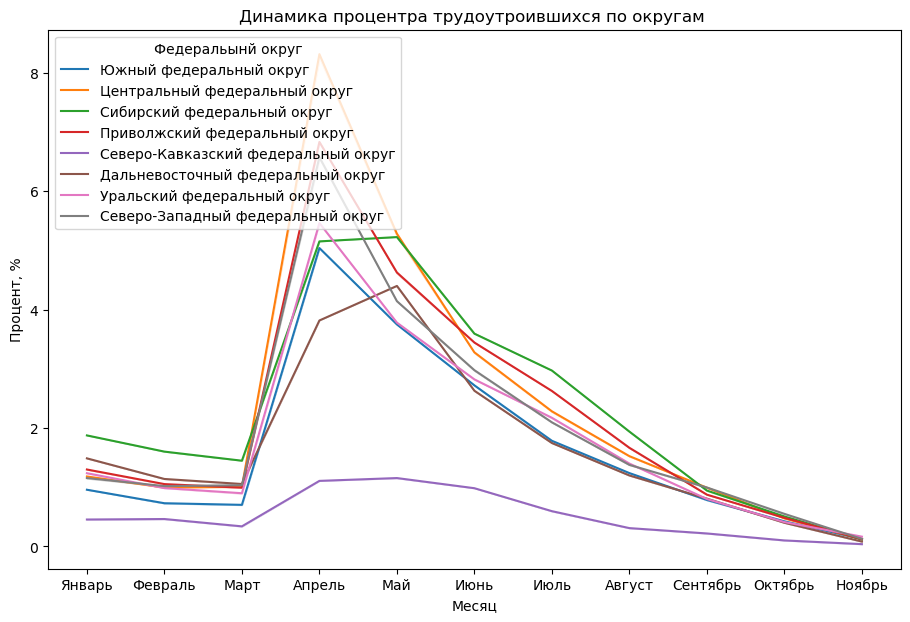

In [22]:
sns.lineplot(data=group_by1[group_by1['find_new_job']==True], x='month', y='%_per_distr', hue='district', ci= False, estimator = np.sum).set(title='Динамика процентра трудоутроившихся по округам ',xlabel='Месяц', ylabel = 'Процент, %')

plt.legend(title='Федеральынй округ', loc='upper left')

plt.savefig('Task6_4.png')

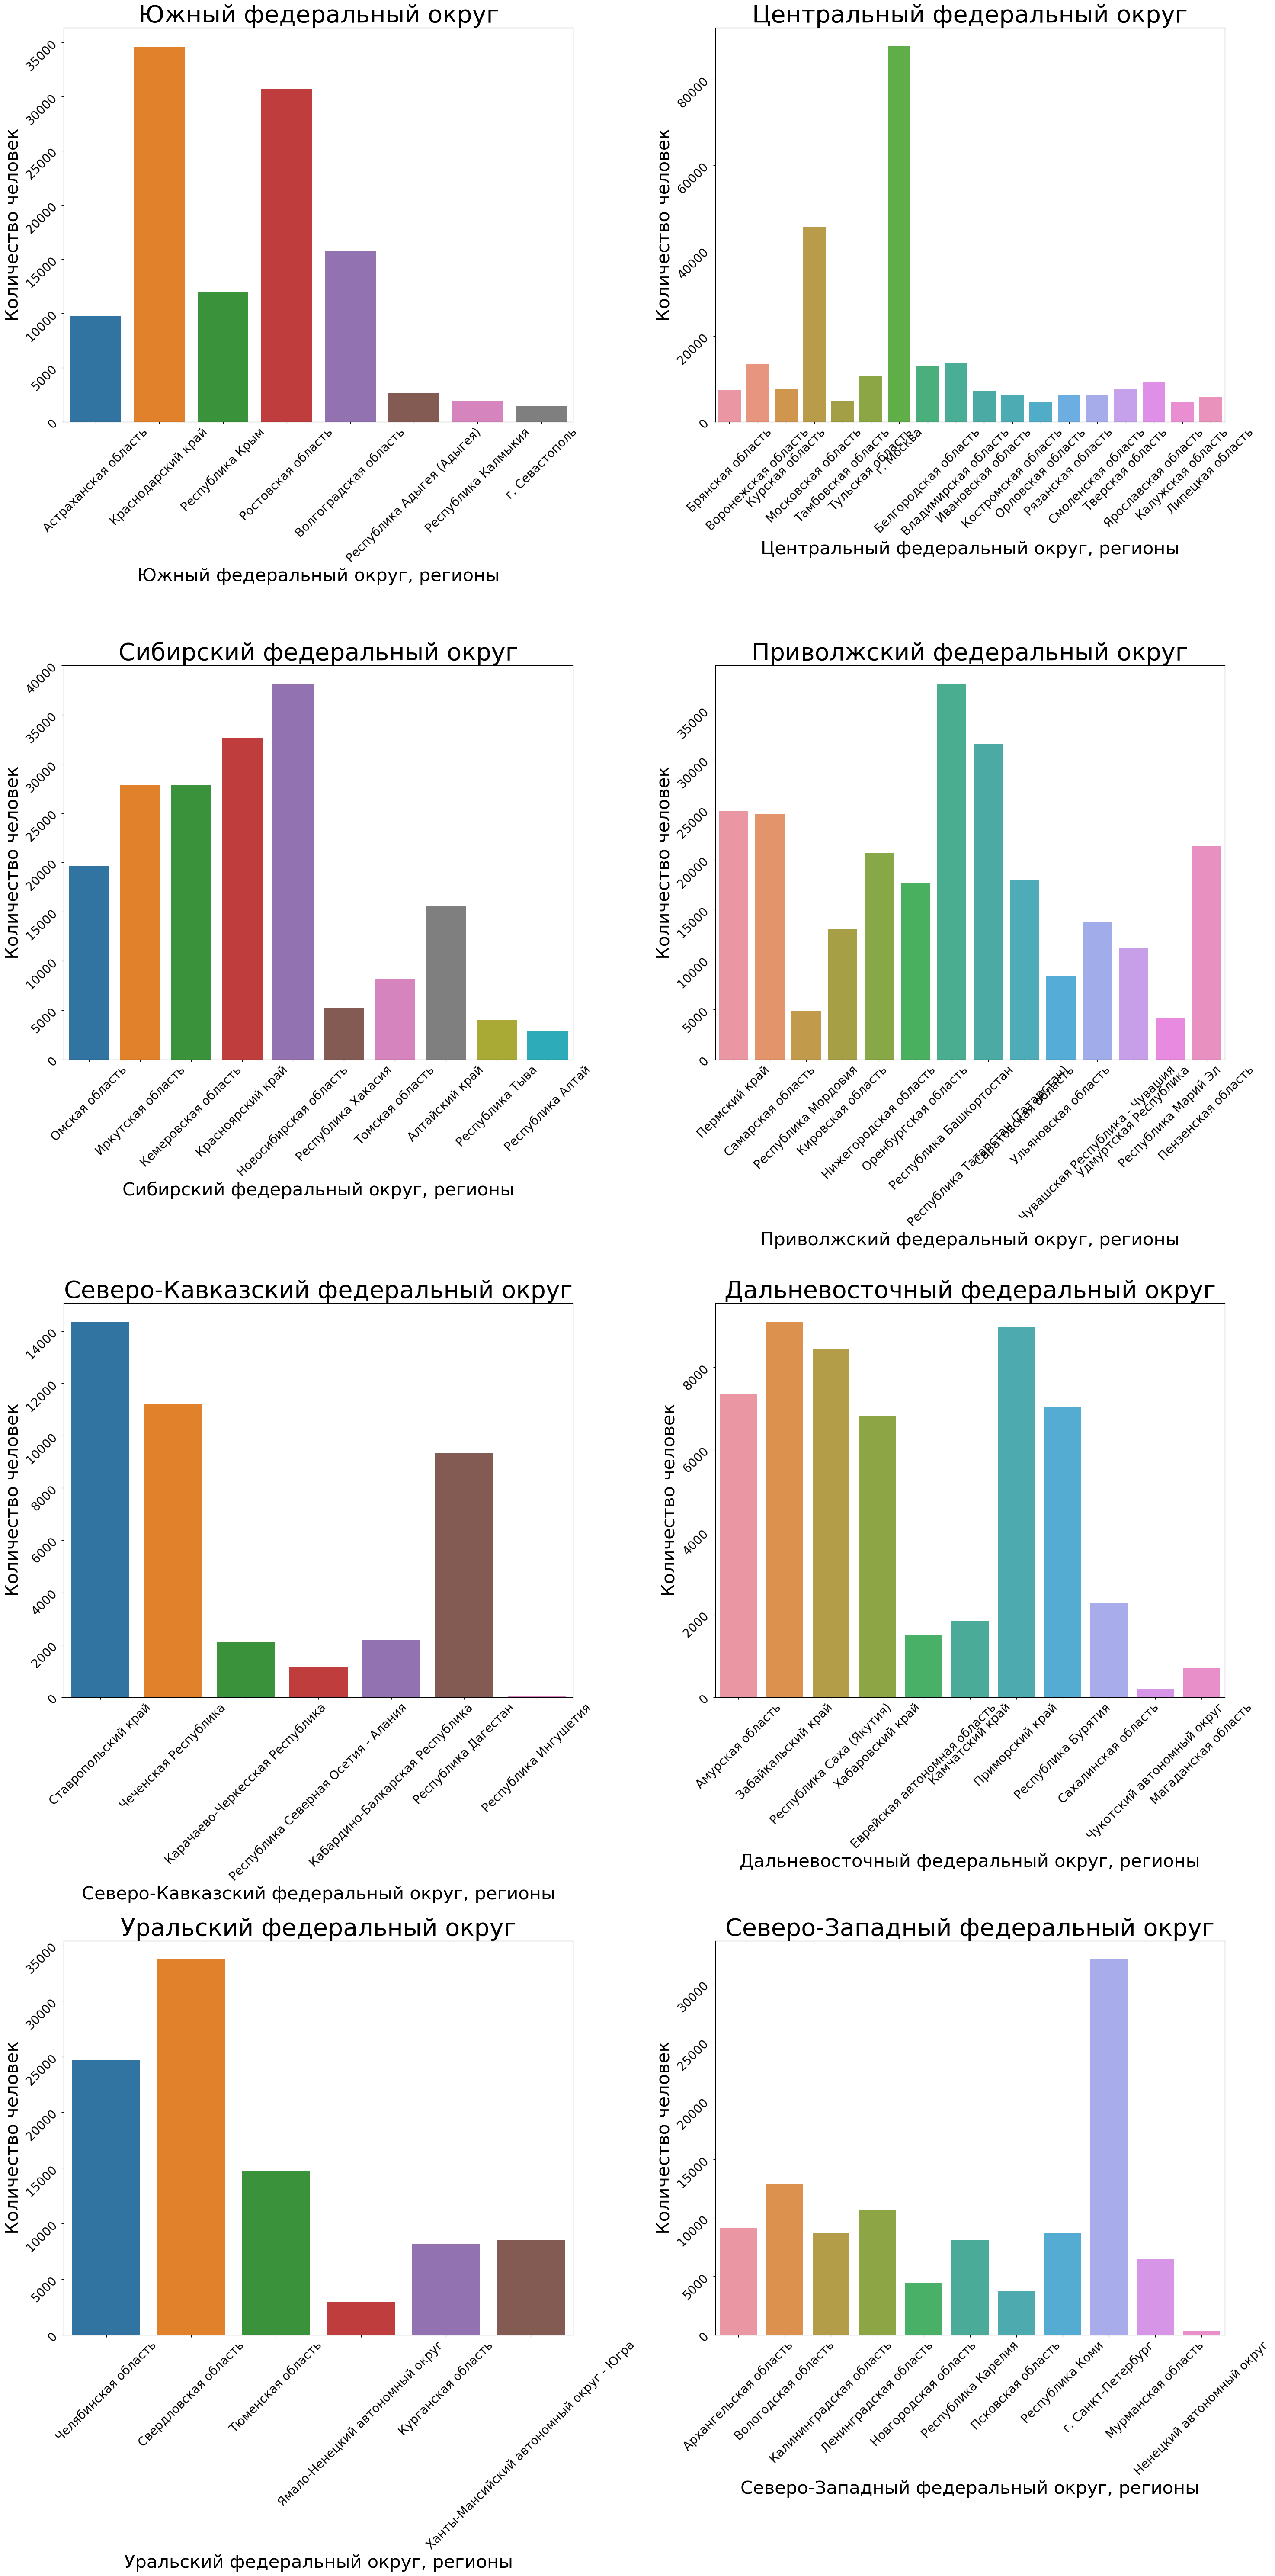

In [24]:
plt.rcParams.update({'font.size': 22})

fig, axes = plt.subplots(4, 2, figsize=(30, 60))

for distr,i in zip(group_by1['district'].unique(), axes.flat):
    b = sns.barplot(ax=i, data = group_by1[group_by1['district']==distr], x='region', y = 'count', estimator = np.sum,ci=False)
    b.axes.set_title(str(distr),fontsize=40)
    b.set_xlabel(str(distr)+', регионы',fontsize=30)
    b.set_ylabel('Количество человек',fontsize=30)
    b.tick_params(labelsize=5)
    plt.xticks(rotation=45)
    i.tick_params(labelrotation=45,labelsize=20)
fig.tight_layout()

plt.savefig('Task6_5.png')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Архангельская область'),
  Text(1, 0, 'Вологодская область'),
  Text(2, 0, 'Калининградская область'),
  Text(3, 0, 'Ленинградская область'),
  Text(4, 0, 'Новгородская область'),
  Text(5, 0, 'Республика Карелия'),
  Text(6, 0, 'Псковская область'),
  Text(7, 0, 'Республика Коми'),
  Text(8, 0, 'г. Санкт-Петербург'),
  Text(9, 0, 'Мурманская область'),
  Text(10, 0, 'Ненецкий автономный округ')])

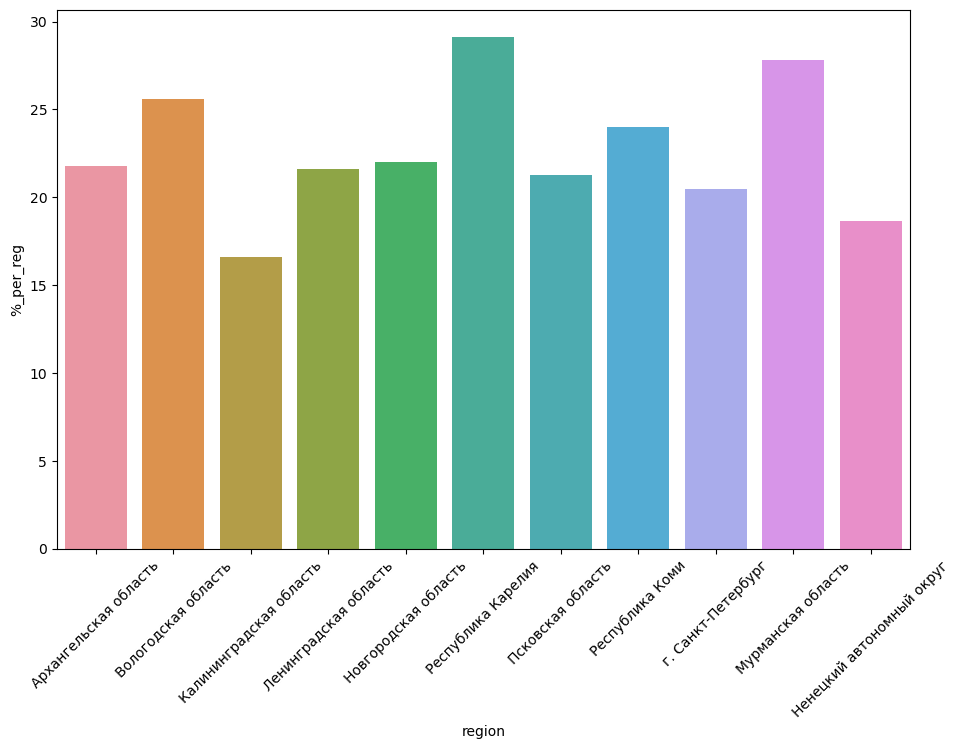

In [161]:
gr1 = sns.barplot(data = group_by1[group_by1['district']==distr], x='region', y = '%_per_reg', estimator = np.sum, ci=False)
plt.xticks(rotation=45)
gr1.set(title='')

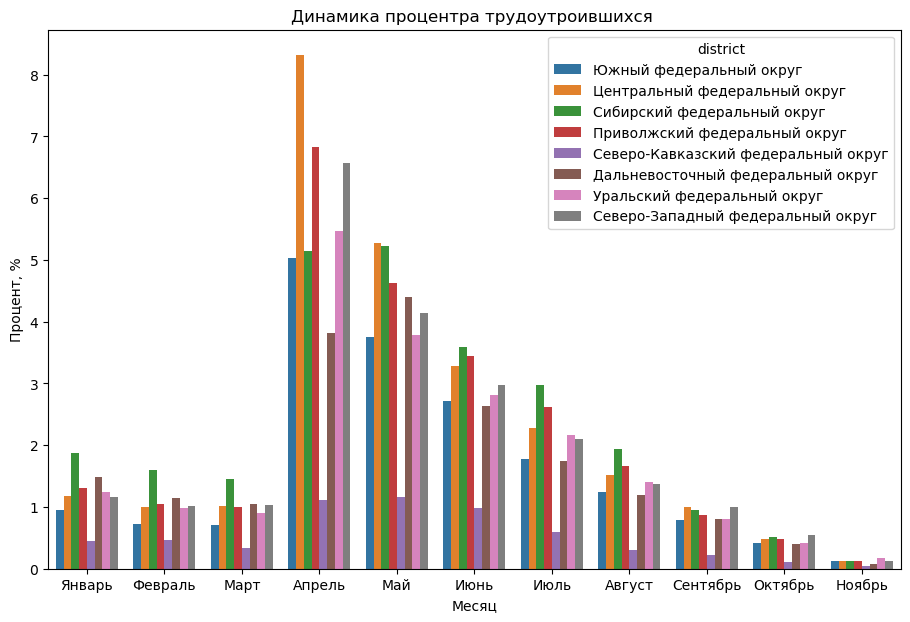

In [30]:
plt.rcParams.update({'font.size': 10})

sns.barplot(data=group_by1[group_by1['find_new_job']==True], x='month', y='%_per_distr', hue='district', ci= False, estimator = np.sum).set(title='Динамика процентра трудоутроившихся ', xlabel='Месяц', ylabel='Процент, %')
plt.savefig('Task6_6.png')

In [27]:
plt.rcParams.update({'font.size': 22})

fig, axes = plt.subplots(4, 2, figsize=(60, 100))

for distr,i in zip(group_by1['district'].unique(), axes.flat):
    b = sns.barplot(ax=i, data = group_by1[group_by1['district']==distr], x='region', y = '%_per_reg', estimator = np.sum,ci=False)
    b.axes.set_title(str(distr),fontsize=80)
    b.set_xlabel(str(distr)+', регионы',fontsize=60)
    b.set_ylabel('Доля человек, %',fontsize=60)
    b.tick_params(labelsize=5)
    i.tick_params(labelrotation=80,labelsize=40)
fig.tight_layout()

plt.savefig('Task6_7.png')